In this notebook, we will cover the following cases for studying the **covariation** between two variables:

* [A categorical and continuous variable](#A-categorical-and-continuous-variable)
* [Two categorical variables](#Two-categorical-variables)
* [Two continuous variables](#Two-continuous-variables)

In [1]:
#options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# A categorical and continuous variable

In [2]:
print(mpg)

# A tibble: 234 x 11
   manufacturer model    displ  year   cyl trans   drv     cty   hwy fl    class
   <chr>        <chr>    <dbl> <int> <int> <chr>   <chr> <int> <int> <chr> <chr>
 1 audi         a4         1.8  1999     4 auto(l… f        18    29 p     comp…
 2 audi         a4         1.8  1999     4 manual… f        21    29 p     comp…
 3 audi         a4         2    2008     4 manual… f        20    31 p     comp…
 4 audi         a4         2    2008     4 auto(a… f        21    30 p     comp…
 5 audi         a4         2.8  1999     6 auto(l… f        16    26 p     comp…
 6 audi         a4         2.8  1999     6 manual… f        18    26 p     comp…
 7 audi         a4         3.1  2008     6 auto(a… f        18    27 p     comp…
 8 audi         a4 quat…   1.8  1999     4 manual… 4        18    26 p     comp…
 9 audi         a4 quat…   1.8  1999     4 auto(l… 4        16    25 p     comp…
10 audi         a4 quat…   2    2008     4 manual… 4        20    28 p     comp…
# … wit

We can map a categorical variable to, say, the **color** aesthetic in a frequency polygon of a continuous variable.

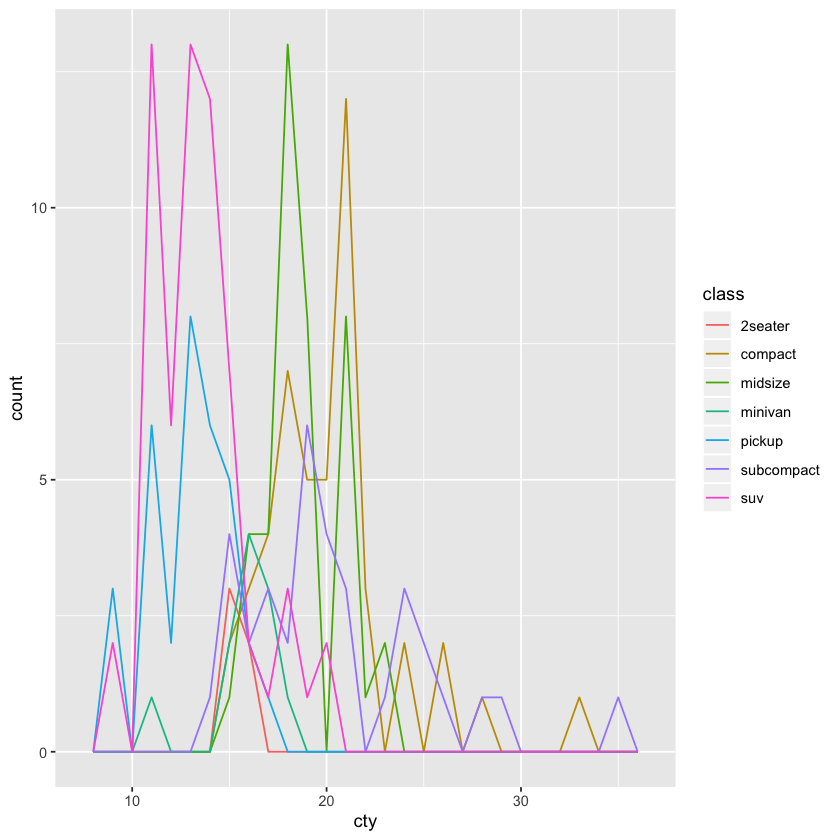

In [3]:
ggplot(data = mpg) +
    geom_freqpoly(mapping = aes(x = cty, color = class), binwidth = 1)

Smaller groups can be hard to see in a frequency polygon since the default for the y-axis is counts.

In [4]:
count(mpg, class)

class,n
<chr>,<int>
2seater,5
compact,47
midsize,41
minivan,11
pickup,33
subcompact,35
suv,62


An alternative is to plot the density instead of counts on the y-axis.

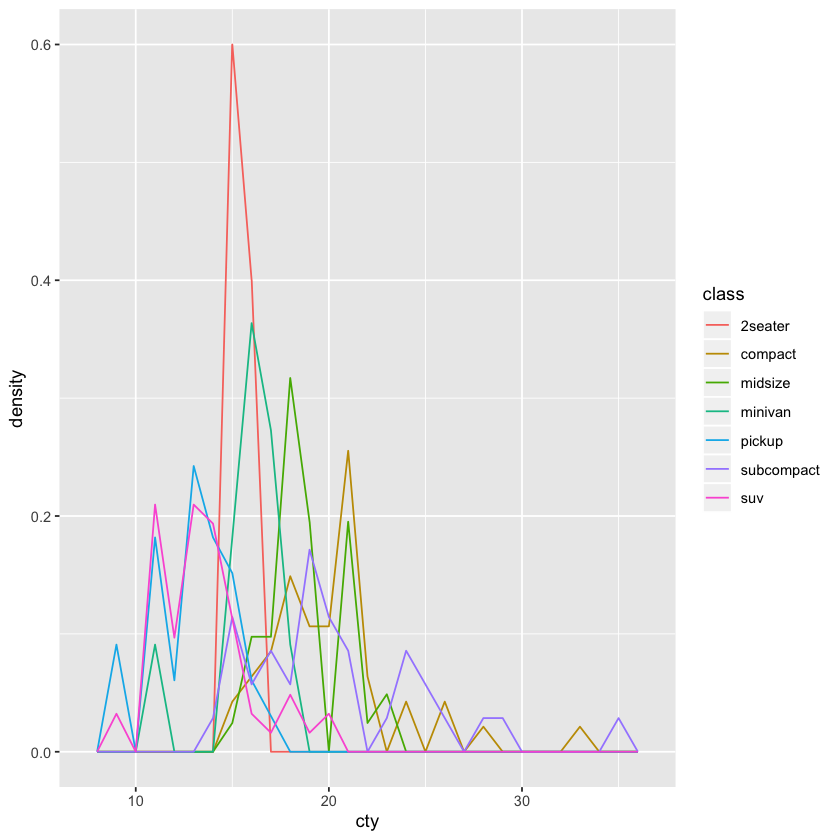

In [5]:
ggplot(data = mpg) +
    geom_freqpoly(mapping = aes(x = cty, y = ..density.., color = class), binwidth = 1)

Mapping the `color` aesthetic to the `class` variable in a histogram does not have a good effect.

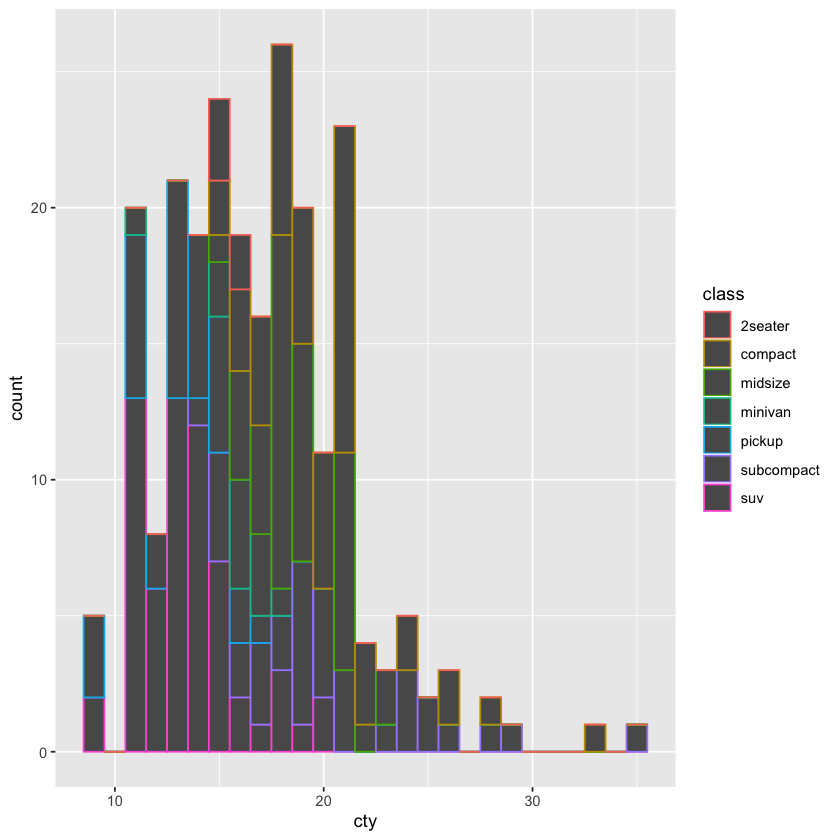

In [6]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, color = class), binwidth = 1)

Changing the **fill** aesthetic to the **color** aesthetic improves the appearance but the plot remains problematic.

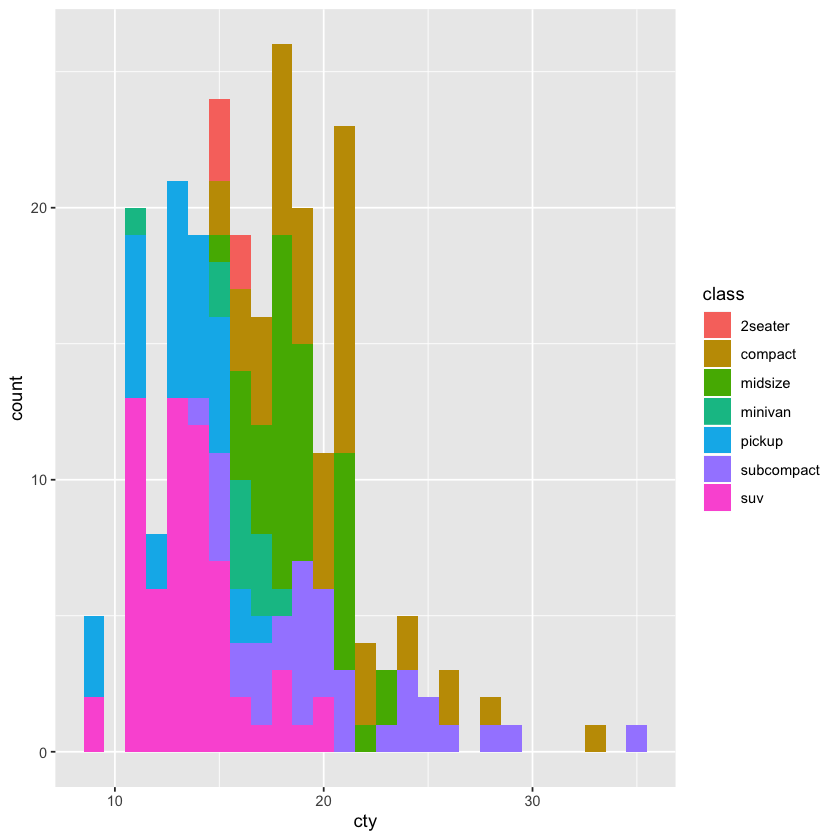

In [7]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, fill = class), binwidth = 1)

Another thing we can do with a categorical, continuous pair is to use a **boxplot**.

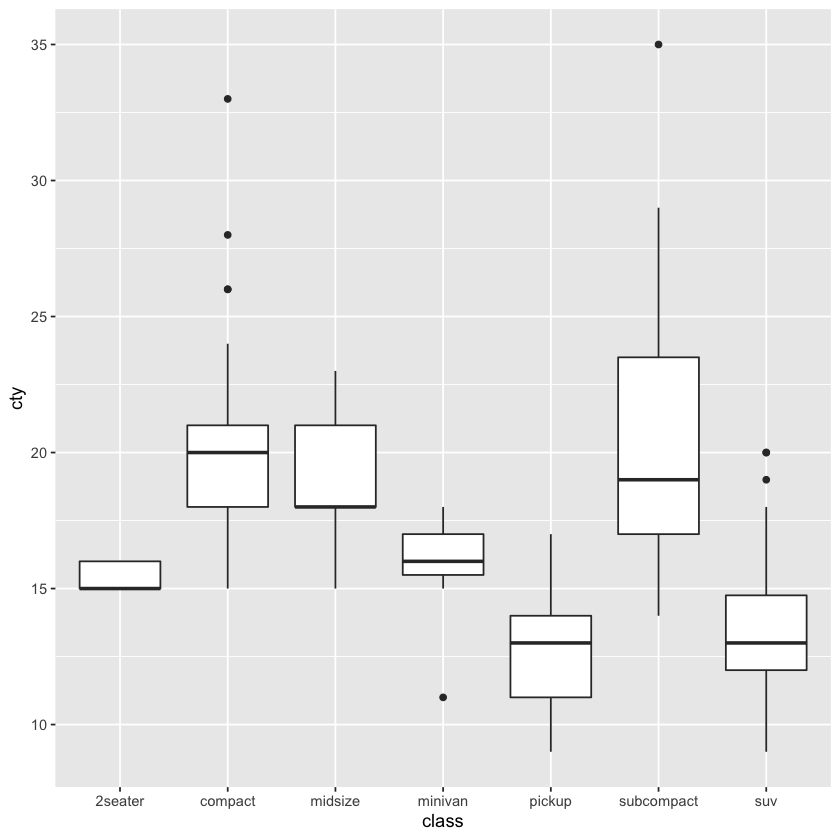

In [8]:
ggplot(data = mpg) + 
    geom_boxplot(mapping = aes(x = class, y = cty))

* The lower and upper hinges correspond to the first and third quartiles (the 25th and 75th percentiles).
* The upper whisker extends from the hinge to the largest value no further than 1.5 * IQR from the hinge (where IQR is the inter-quartile range, or distance between the first and third quartiles).
* The lower whisker extends from the hinge to the smallest value at most 1.5 * IQR of the hinge.
* Data beyond the end of the whiskers are called "outlying" points and are plotted individually.

To replot with `class` values listed in order of the median value for `cty`, we can use the `reorder()` function.

```
reorder(cat, con, FUN = median)
```

reorders the levels of the categorical variable `cat` according the continuous variable `con`. The function `median()` is applied the the `con` values corresponding to a fixed level of `cat`. Default value of the `FUN` argument is `mean`.

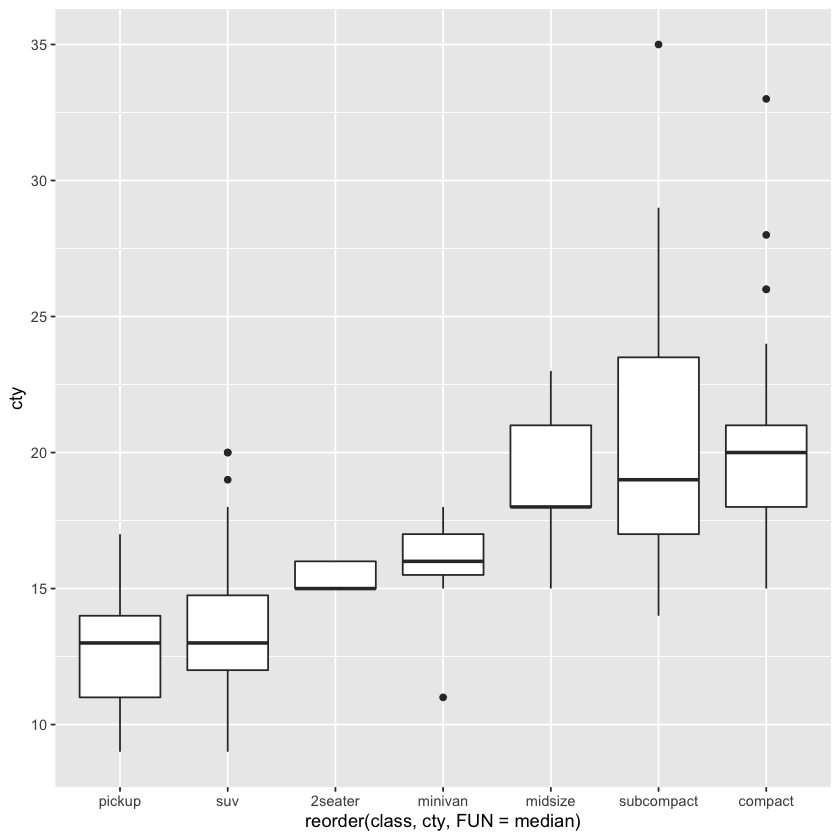

In [9]:
ggplot(data = mpg) +
    geom_boxplot(mapping = aes(x = reorder(class, cty, FUN = median), y = cty))

We can flip the x, y axes if the categorical level names are long

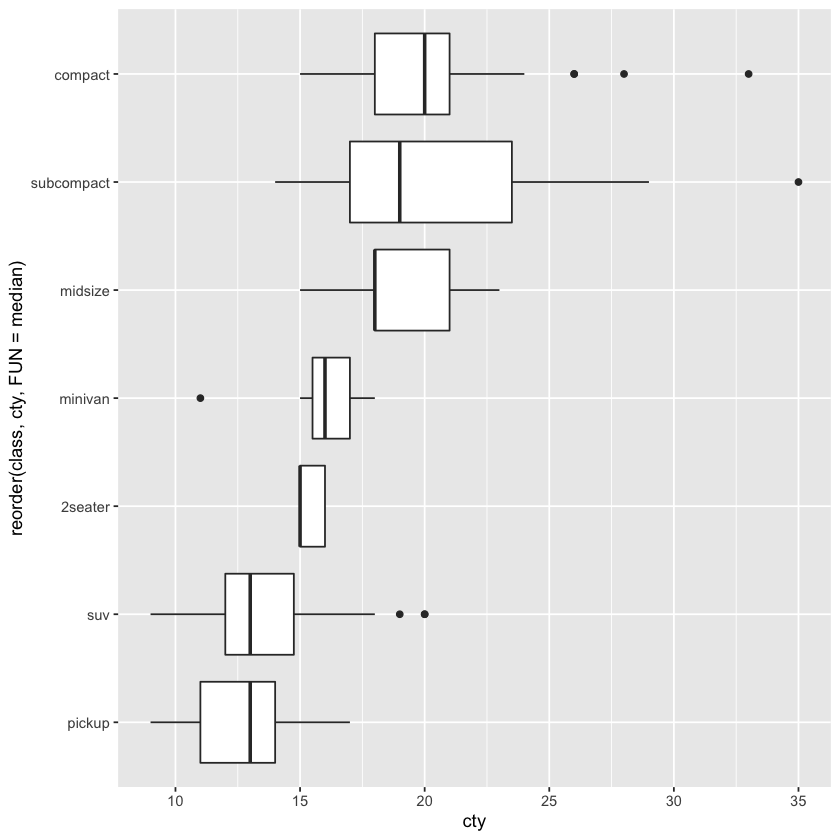

In [10]:
ggplot(data = mpg) + 
    geom_boxplot(mapping = aes(x = reorder(class, cty, FUN = median), y = cty)) +
    coord_flip()

Contrast this with faceting the `cty` histogram on the `class` variable.

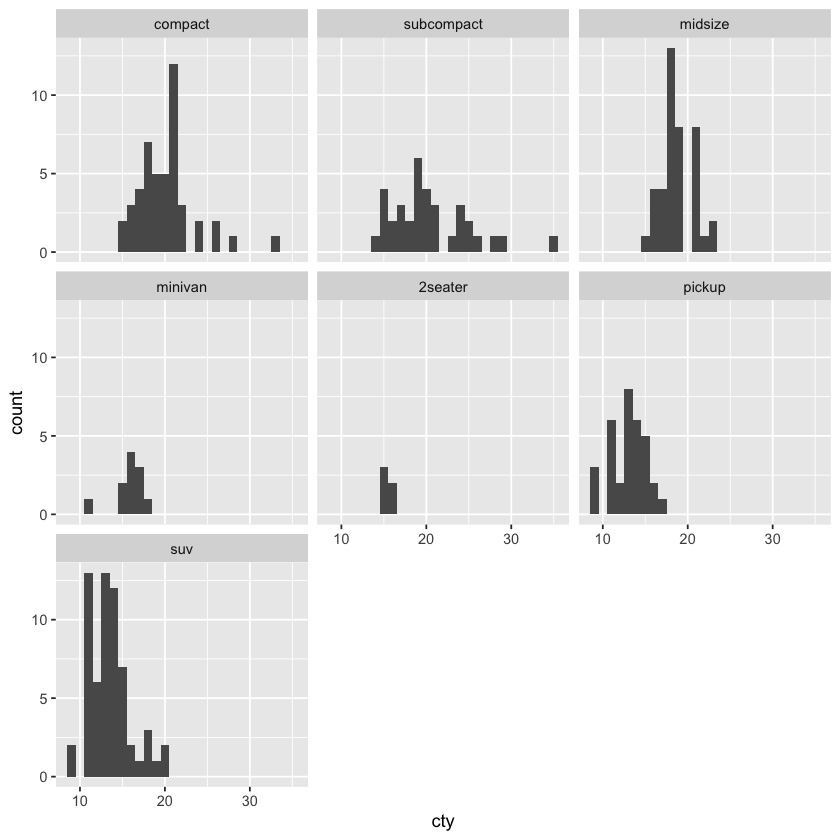

In [11]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty), binwidth = 1) +
    facet_wrap(~ reorder(class, desc(cty), FUN = median))

We also superimpose the points themselves on top of the boxplot by adding `geom_jitter`. But it is a good idea to hide the outliers by setting `outlier.shape = NA` first.

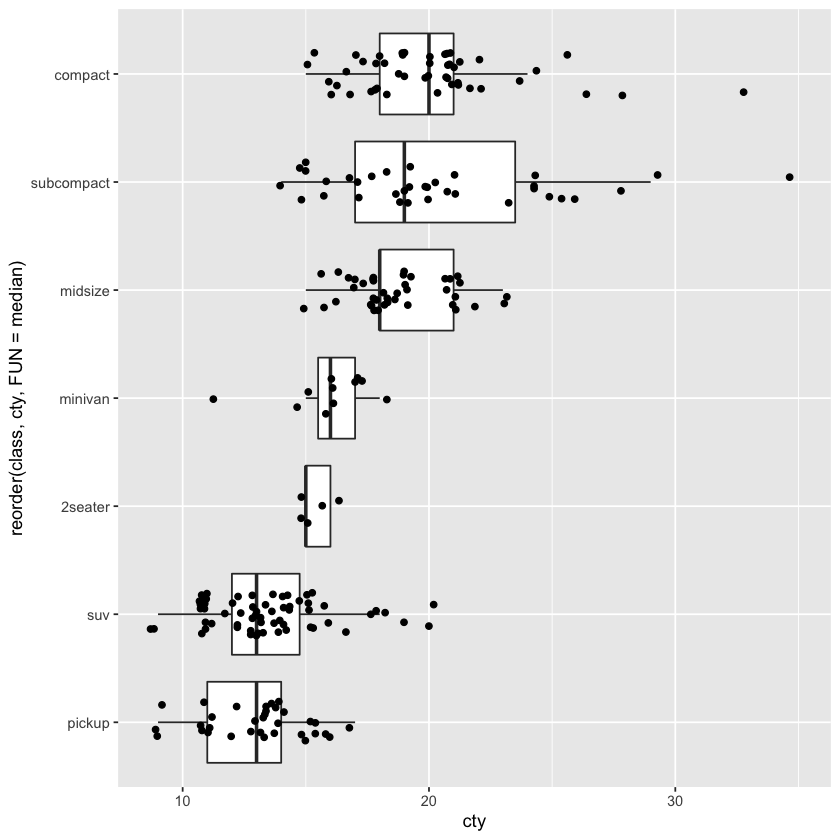

In [12]:
ggplot(data = mpg, mapping = aes(x = reorder(class, cty, FUN = median), y = cty)) + 
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = .2) +
    coord_flip()

# Two categorical variables

`geom_count` can be used to visualize two categorical variables.

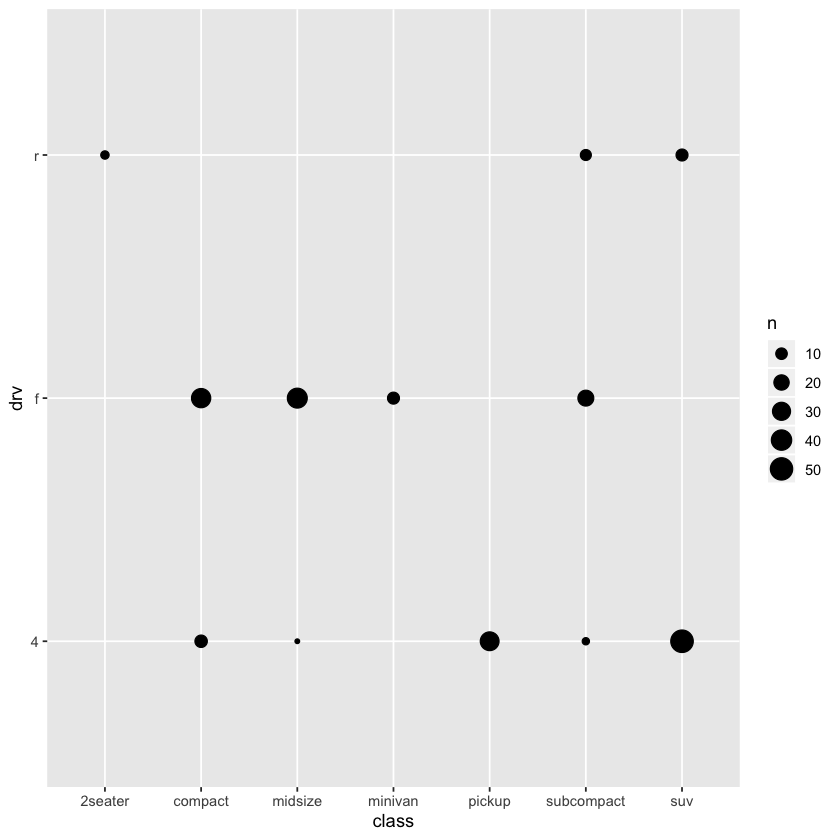

In [13]:
ggplot(data = mpg) +
    geom_count(mapping = aes(x = class, y = drv))

We can compute these numbers using `count()`.

In [14]:
mpg %>%
    count(class, drv)

class,drv,n
<chr>,<chr>,<int>
2seater,r,5
compact,4,12
compact,f,35
midsize,4,3
midsize,f,38
minivan,f,11
pickup,4,33
subcompact,4,4
subcompact,f,22


These counts can be fed to other geometries.

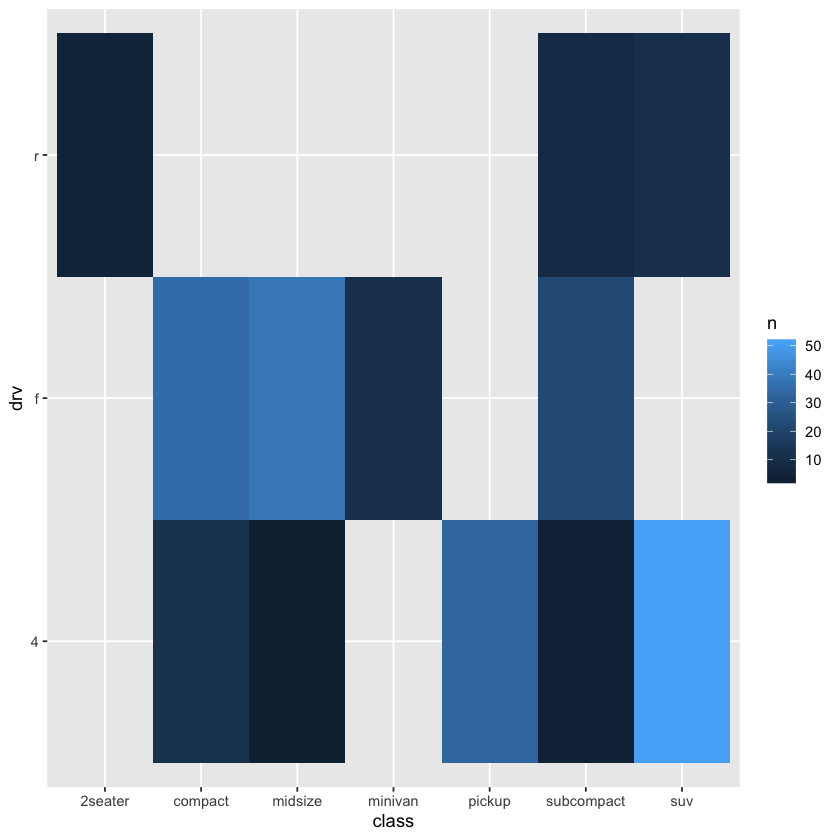

In [15]:
mpg %>%
    count(class, drv) %>%
    ggplot() +
        geom_tile(mapping = aes(x = class, y = drv, fill = n))

# Two continuous variables

We already know a lot about scatterplots. Once you have too many points, you may want to use `geom_bin2d` or `geom_hex`.

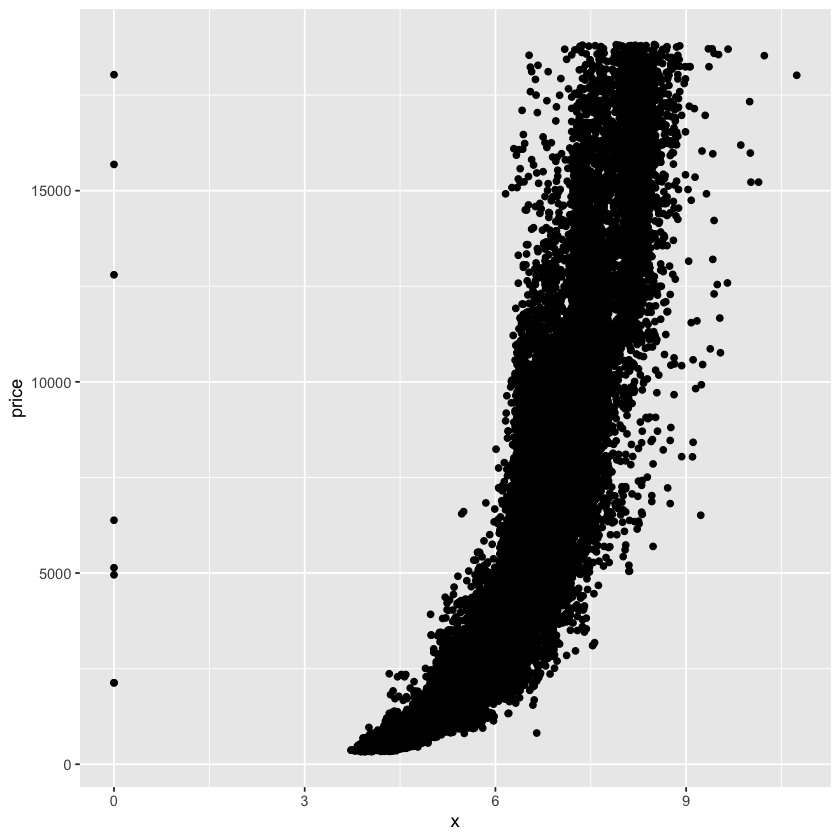

In [16]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = x, y = price))

Sometimes setting the transparency of points using `alpha` can help.

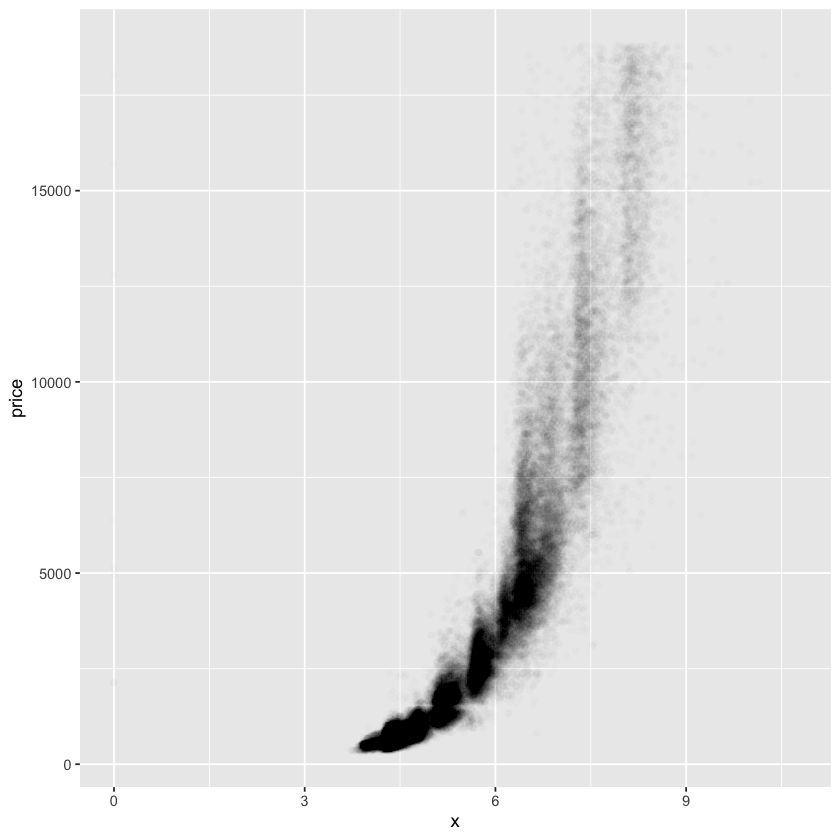

In [17]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = x, y = price), alpha = 0.01)

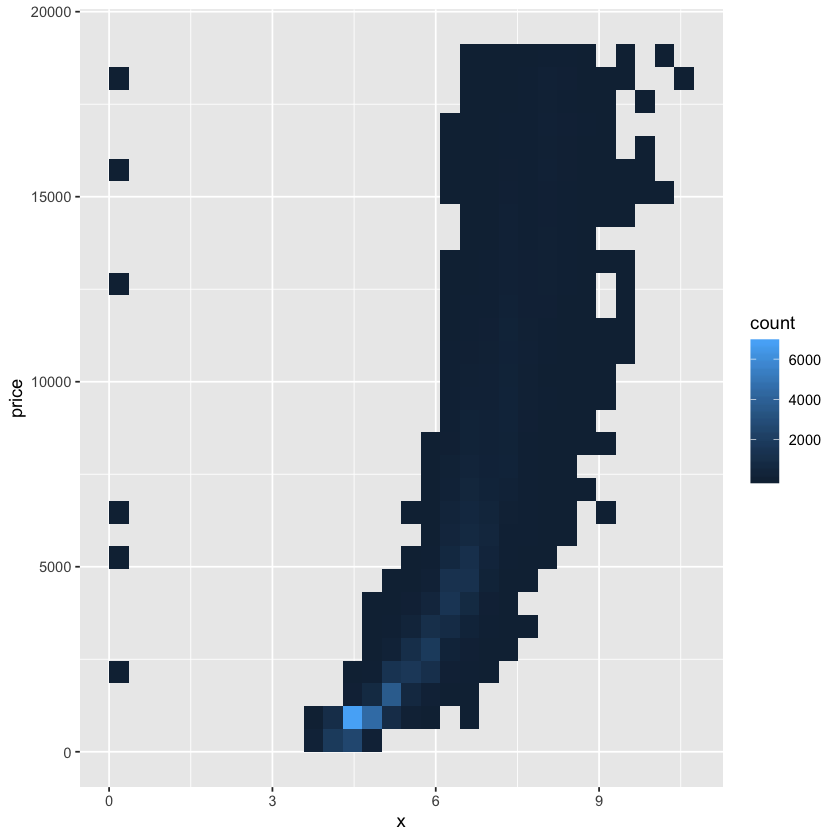

In [18]:
ggplot(data = diamonds) +
    geom_bin2d(mapping = aes(x = x, y = price))

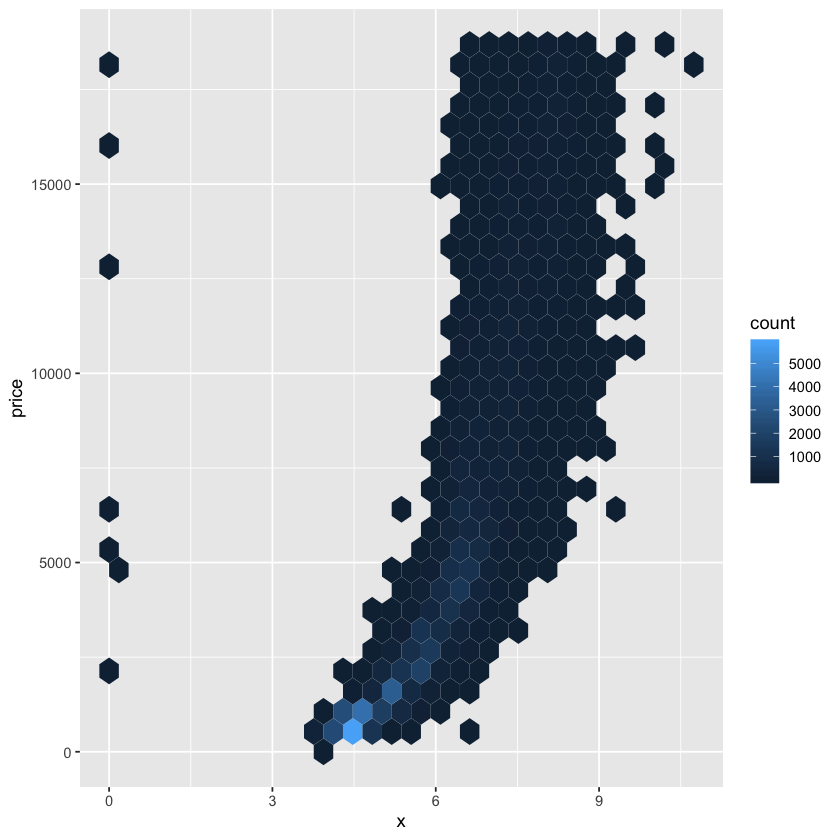

In [19]:
ggplot(data = diamonds) +
    geom_hex(mapping = aes(x = x, y = price))

Let us try to see what happens if we use a boxplot with 2 continuous variables: `price` as a function of `carat` for the `diamonds` tibble.

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


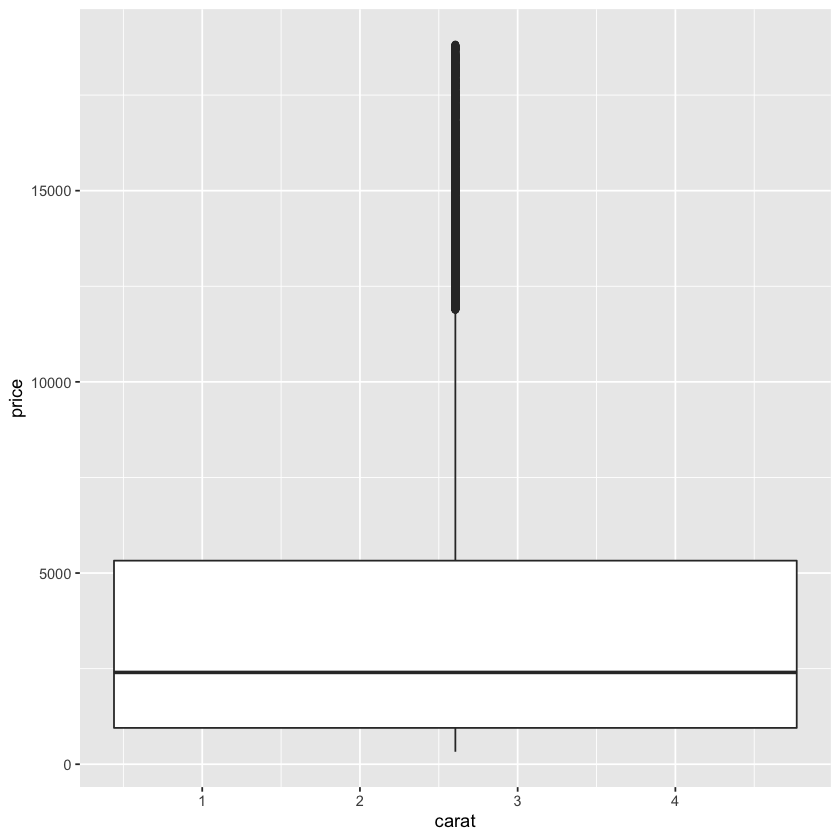

In [20]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price))

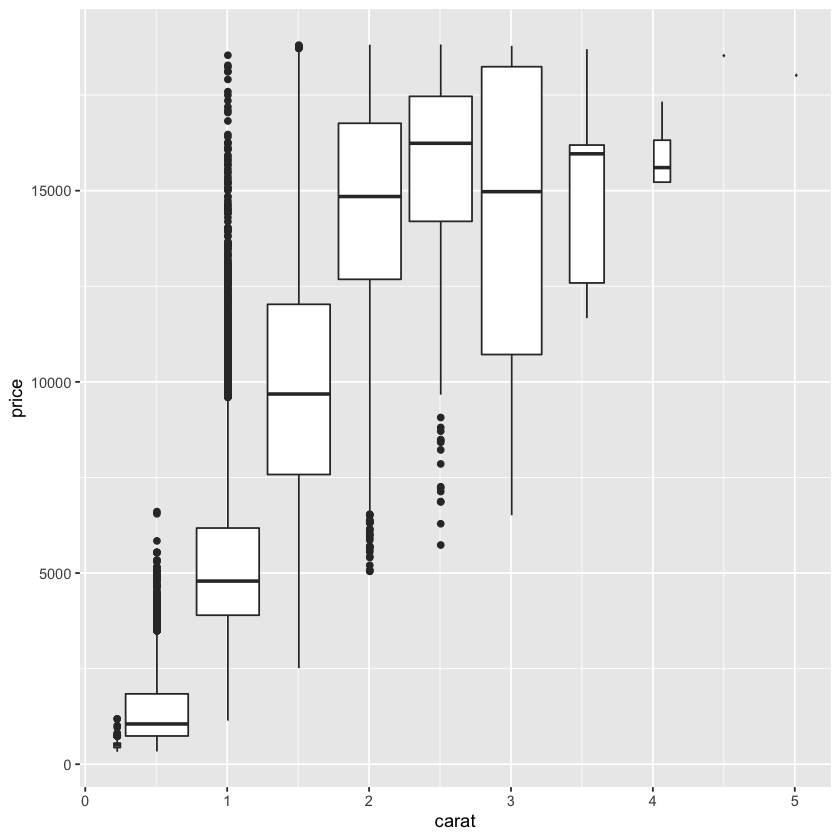

In [21]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price, group = cut_width(carat, 0.5)))

If outliers run into each other, you could adjust `outlier.alpha`.

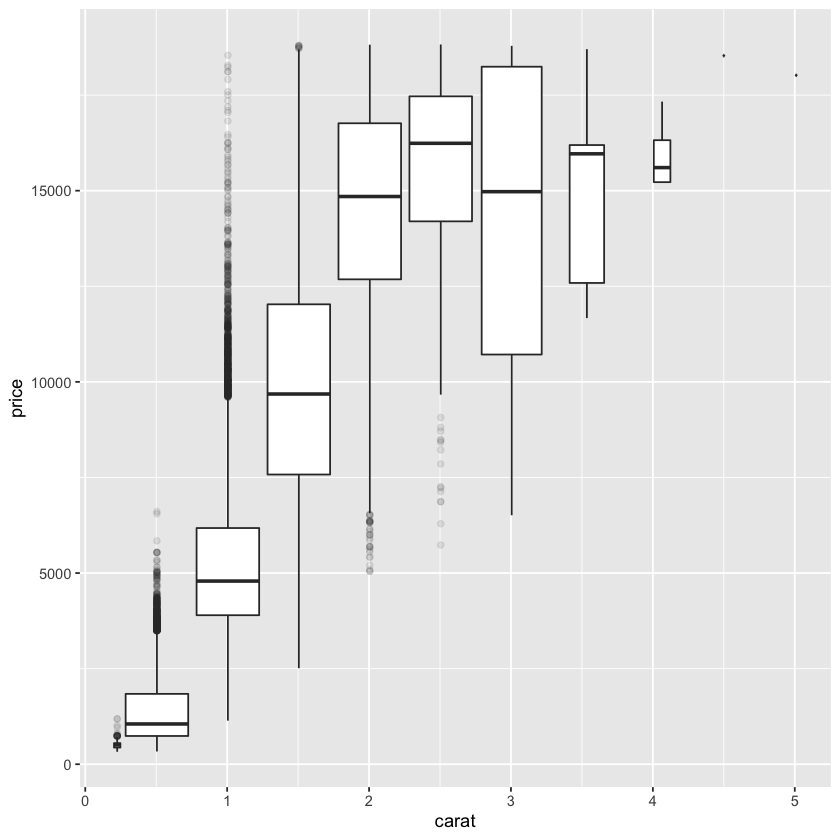

In [22]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price, group = cut_width(carat, 0.5)), outlier.alpha = 0.1)